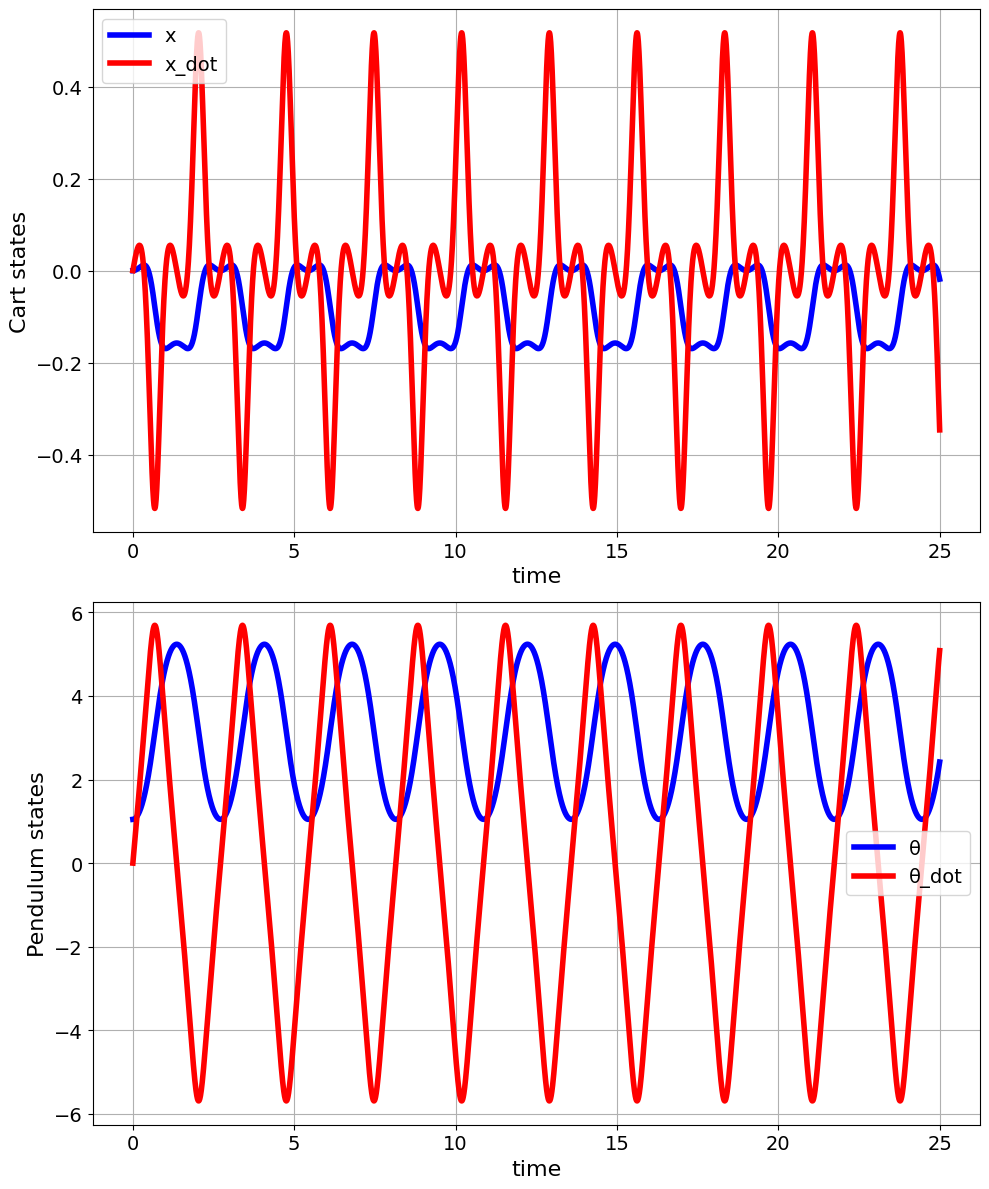

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from sympy import * # import all function names, whole library
from sympy.physics.vector import init_vprinting, dynamicsymbols, vpprint # for time non-static vector symbolic representation

init_vprinting() # Enhances display of dynamic symbols more beautifully, for normal ones uses init_printing()

# Symbolic representations of cart mass, point mass, length of rod, accn due to gravity, and force
m1, m2, l, g, F= symbols('m1 m2 l g F')

# Symbolic representation of state vectors x, x_dot, theta, theta_dot using dynamic symbols
x=dynamicsymbols('x')
x_dot= x.diff()
x_ddot= x.diff().diff()

theta=dynamicsymbols('θ')
theta_dot=theta.diff()
theta_ddot=theta.diff().diff()

# Writing down equations of motion of inverted pendulum
e1= (m1+m2)*x_ddot - m2*l*cos(theta)*theta_ddot + m2*l*sin(theta)*theta_dot**2 - F
e2= -cos(theta)*x_ddot + l*theta_ddot -g*sin(theta)

# We need to solve e1 and e2 to find x_ddot and theta_ddot since there are only two state variables each
# obtained from looking at the highest order of the eqations
result= solve([e1,e2],x_ddot,theta_ddot, dict=True)

# The obtained solutions were very long and complex, which can be simplified by using:
x_ddot_solved= simplify(result[0][x_ddot]) # result part is Accessing values from dictionary
theta_ddot_solved= simplify(result[0][theta_ddot]) 

# Now choosing values for masses, gravity, and length and then substituting values of known quantities in solved equations
##### We can change these constants with desired values #####
lval=1
m1val=10
m2val=1
gval=9.81

x_ddot_subbed= x_ddot_solved.subs(l,lval).subs(g,gval).subs(m1,m1val).subs(m2,m2val)
theta_ddot_subbed= theta_ddot_solved.subs(l,lval).subs(g,gval).subs(m1,m1val).subs(m2,m2val)

# Converting symbolic expressions into python/mathematical functions using lambdify from sympy
func_x_ddot= lambdify([x, x_dot, theta, theta_dot, F], x_ddot_subbed) # Placing values/symbols for each state variables and input into equation x_ddot_solved
func_theta_ddot= lambdify([x, x_dot, theta, theta_dot, F], theta_ddot_subbed)

def stateSpaceModel(state, t, timePoints, forceArray):  # the state argument is provided automatically by ode solver which starts from initial conditions that we provide
    x, x_dot, theta, theta_dot = state  # unpacking current state variables. i.e. x=state[0], x_dot=state[1], and so on...
    
    forceApplied= np.interp(t, timePoints, forceArray)
    x_ddot= func_x_ddot(x, x_dot, theta, theta_dot, forceApplied) # Placing numerical values for each state variables and inputs into now converted mathematical function
    theta_ddot= func_theta_ddot(x, x_dot, theta, theta_dot, forceApplied)
    
    return [x_dot, x_ddot, theta_dot, theta_ddot]   # returning derivatives of state variables, i.e. d/dt(state)

# Defining simulation parameters #### Can change it
startTime=0
endTime=25
timeSteps=5000

simTime= np.linspace(startTime,endTime,timeSteps)   # Generating discrete time interval
# forceInput= np.sin(simTime)+np.cos(2*simTime) # Generating sine and cosine function over time
forceInput= np.zeros(shape=(simTime.shape)) # Zero force applied

#plt.plot(simTime,forceInput)

##  Simulating the dynamics of the system
initState= np.array([0,0,np.pi/3,0])   # initial conditions position, velocity, and angular velocity are zero, while angular displacement is pi/3 rad

solution= odeint(stateSpaceModel, initState, simTime, args=(simTime, forceInput))   # Extra arguments required for our function time points and force applied is also provided
# solution.shape ## it shows that there are 5000 rows(values due to timesteps), and 4 cols (state variables)

# save the simulation data
# the save file is opened by another Python script that is used to animate the trajectory
np.save('simulationData.npy', solution)


# Create a figure with 2 subplots (2 rows, 1 column)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# First subplot: Cart states
ax1.plot(simTime, solution[:,0], 'b', linewidth=4, label='x')
ax1.plot(simTime, solution[:,1], 'r', linewidth=4, label='x_dot')
ax1.set_xlabel('time', fontsize=16)
ax1.set_ylabel('Cart states', fontsize=16)
ax1.legend(fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.grid()

# Second subplot: Pendulum states
ax2.plot(simTime, solution[:,2], 'b', linewidth=4, label='θ')
ax2.plot(simTime, solution[:,3], 'r', linewidth=4, label='θ_dot')
ax2.set_xlabel('time', fontsize=16)
ax2.set_ylabel('Pendulum states', fontsize=16)
ax2.legend(fontsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)
ax2.grid()

# Adjust layout to prevent overlapping
plt.tight_layout()

# Save the figure
plt.savefig('all_states.png', dpi=600)
plt.show()

In [2]:
# The following cells are step wise checking of each variable values
x_dot

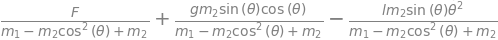

In [3]:
result[0][x_ddot]

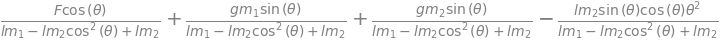

In [4]:
result[0][theta_ddot]

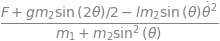

In [5]:
x_ddot_solved

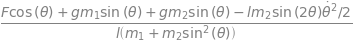

In [6]:
theta_ddot_solved

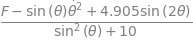

In [7]:
x_ddot_subbed

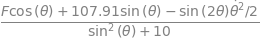

In [8]:
theta_ddot_subbed

In [9]:
func_theta_ddot(1,2,3,4,-1)

In [10]:
solution.shape